<font size="6" color='#ff7234'>Multiple Regression</font>

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer

In [3]:
df = pd.read_csv('NIFTY_50.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,19-NOV-2024,23529.55,23780.65,23464.80,23518.50,297477279,30486.78
1,21-NOV-2024,23488.45,23507.30,23263.15,23349.90,420332354,40900.89
2,22-NOV-2024,23411.80,23956.10,23359.00,23907.25,367562789,39257.52
3,25-NOV-2024,24253.55,24351.55,24135.45,24221.90,687172787,85975.81
4,26-NOV-2024,24343.30,24343.30,24125.40,24194.50,230691771,24140.67


In [5]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,19-NOV-2024,23529.55,23780.65,23464.80,23518.50,297477279,30486.78
1,21-NOV-2024,23488.45,23507.30,23263.15,23349.90,420332354,40900.89
2,22-NOV-2024,23411.80,23956.10,23359.00,23907.25,367562789,39257.52
3,25-NOV-2024,24253.55,24351.55,24135.45,24221.90,687172787,85975.81
4,26-NOV-2024,24343.30,24343.30,24125.40,24194.50,230691771,24140.67


In [6]:
df.shape

(65, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             65 non-null     object 
 1   Open             65 non-null     float64
 2   High             65 non-null     float64
 3   Low              65 non-null     float64
 4   Close            65 non-null     float64
 5   Shares Traded    65 non-null     int64  
 6   Turnover (₹ Cr)  65 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.7+ KB


In [8]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

In [9]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,65.000000,65.000000,65.000000,65.000000,6.500000e+01,65.000000
mean,23726.129231,23836.730000,23575.797692,23701.490000,2.860115e+08,28215.205385
std,537.829356,538.611395,536.997997,547.641412,7.985044e+07,9752.826232
min,22809.900000,22974.200000,22725.450000,22829.150000,1.549219e+08,14266.260000
25%,23290.400000,23381.600000,23139.200000,23213.200000,2.481393e+08,23315.920000
50%,23674.750000,23780.650000,23503.050000,23644.800000,2.729453e+08,26890.370000
75%,24196.400000,24301.700000,23976.000000,24188.650000,3.128719e+08,30885.590000
max,24753.400000,24857.750000,24620.500000,24768.300000,6.871728e+08,85975.810000


In [10]:
df = df.rename(columns={'Date ':'Date', 'Open ':'Open', 'High ':'High', 'Low ':'Low', 'Close ':'Close', 'Shares Traded ':'Shares Traded', 'Turnover (₹ Cr)' : 'Turnover(₹ Cr)'})

<font size="4" color='yellow'>Handling Date and Time</font>

In [11]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%Y")

In [12]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover(₹ Cr)', 'Day', 'Month', 'Year'],
      dtype='object')

In [14]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),Day,Month,Year
0,2024-11-19,23529.55,23780.65,23464.80,23518.50,297477279,30486.78,19,11,2024
1,2024-11-21,23488.45,23507.30,23263.15,23349.90,420332354,40900.89,21,11,2024
2,2024-11-22,23411.80,23956.10,23359.00,23907.25,367562789,39257.52,22,11,2024
3,2024-11-25,24253.55,24351.55,24135.45,24221.90,687172787,85975.81,25,11,2024
4,2024-11-26,24343.30,24343.30,24125.40,24194.50,230691771,24140.67,26,11,2024


In [15]:
df.drop('Date', axis=1, inplace=True)

In [16]:
df.head(2)

,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),Day,Month,Year
0,23529.55,23780.65,23464.80,23518.5,297477279,30486.78,19,11,2024
1,23488.45,23507.30,23263.15,23349.9,420332354,40900.89,21,11,2024


In [17]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Shares Traded     0
Turnover(₹ Cr)    0
Day               0
Month             0
Year              0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            65 non-null     float64
 1   High            65 non-null     float64
 2   Low             65 non-null     float64
 3   Close           65 non-null     float64
 4   Shares Traded   65 non-null     int64  
 5   Turnover(₹ Cr)  65 non-null     float64
 6   Day             65 non-null     int32  
 7   Month           65 non-null     int32  
 8   Year            65 non-null     int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 3.9 KB


<font size="6" color='pink'>Visualization</font>

<font size="4" color='yellow'>HeatMap</font>

In [19]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix

,Open,High,Low,Close,Shares Traded,Turnover(₹ Cr),Day,Month,Year
Open,1.000000,0.981552,0.978097,0.952034,0.017643,0.151859,-0.268100,0.733698,-0.728766
High,0.981552,1.000000,0.974685,0.979971,0.047049,0.185937,-0.246611,0.758629,-0.757202
Low,0.978097,0.974685,1.000000,0.976202,-0.018917,0.122769,-0.237830,0.749751,-0.746887
Close,0.952034,0.979971,0.976202,1.000000,0.006217,0.147186,-0.261227,0.744456,-0.741556
Shares Traded,0.017643,0.047049,-0.018917,0.006217,1.000000,0.960216,0.082519,0.016010,-0.040429
Turnover(₹ Cr),0.151859,0.185937,0.122769,0.147186,0.960216,1.000000,0.090227,0.156507,-0.183596
Day,-0.268100,-0.246611,-0.237830,-0.261227,0.082519,0.090227,1.000000,0.196271,-0.234045
Month,0.733698,0.758629,0.749751,0.744456,0.016010,0.156507,0.196271,1.000000,-0.995938
Year,-0.728766,-0.757202,-0.746887,-0.741556,-0.040429,-0.183596,-0.234045,-0.995938,1.000000


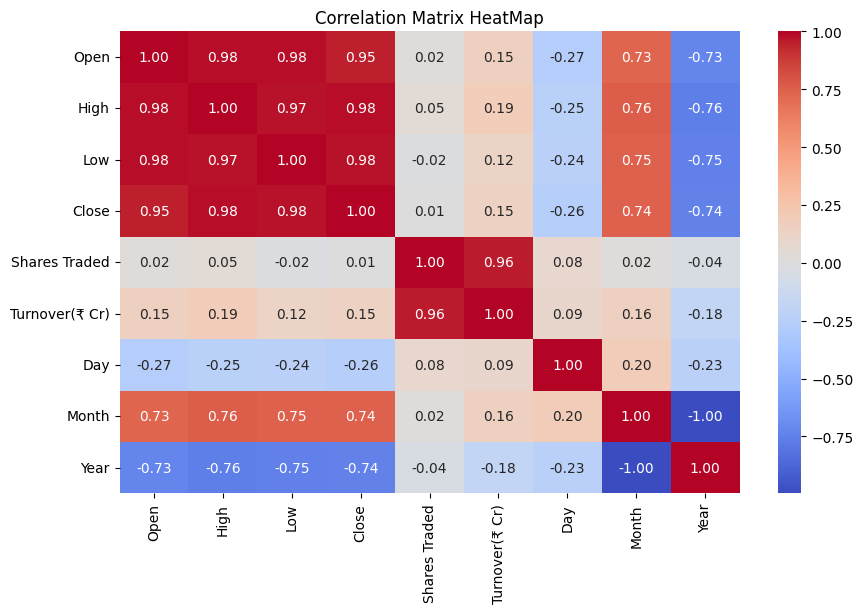

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Matrix HeatMap")
plt.show()

<font size="4" color='yellow'>Scatter Charts</font>

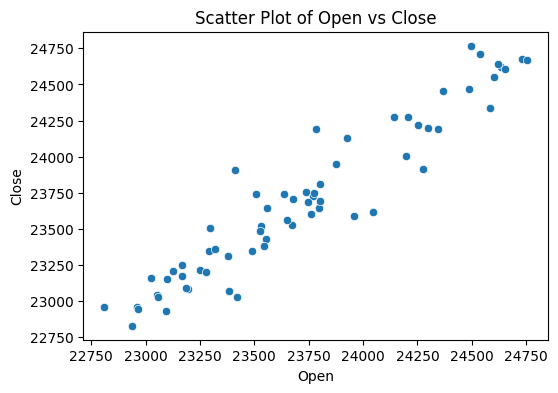

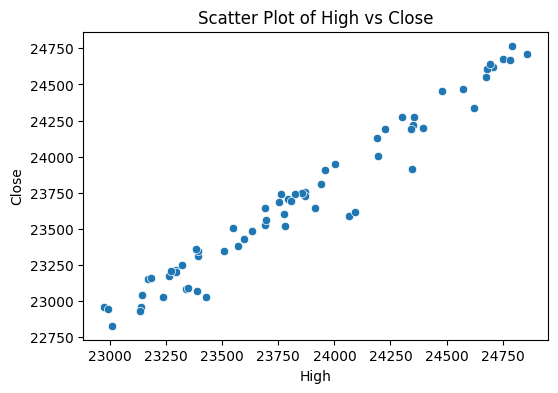

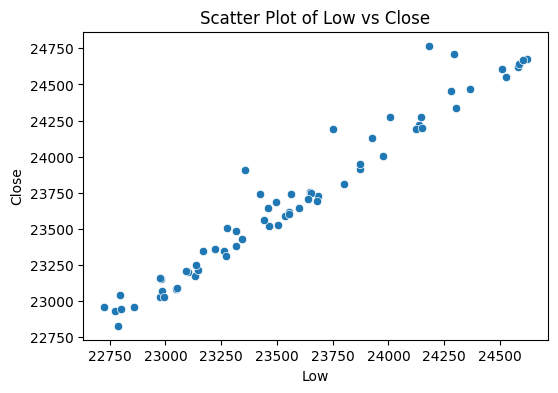

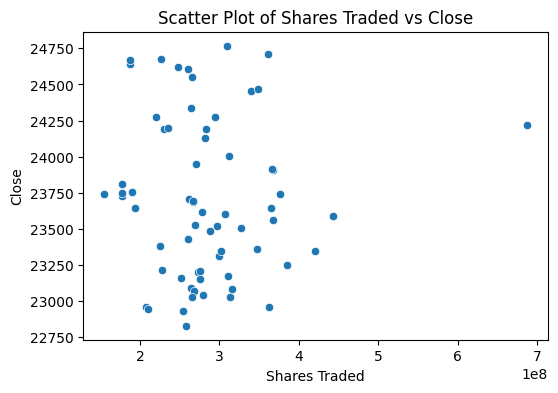

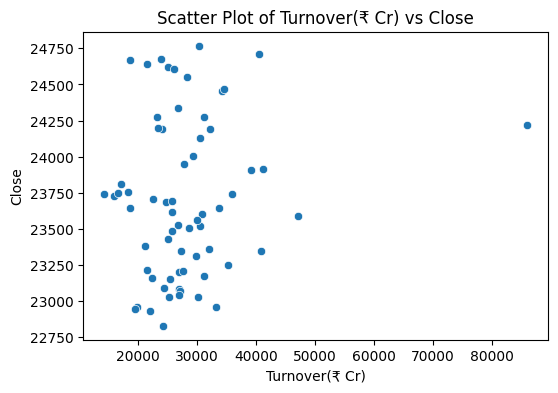

In [21]:
features = ["Open", "High", "Low", "Shares Traded", "Turnover(₹ Cr)"]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df["Close"])
    plt.title(f"Scatter Plot of {feature} vs Close")
    plt.show()

<font size="6" color='pink'>Data Splitting</font>

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover(₹ Cr)',
       'Day', 'Month', 'Year'],
      dtype='object')

In [23]:
y = df['Close']
df.drop('Close', axis=1, inplace=True)
X= df

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(f"Length of X_train is {len(X_train)}")
print(f"Length of X_test is {len(X_test)}")
print(f"Length of y_train is {len(y_train)}")
print(f"Length of y_test is {len(y_test)}")

Length of X_train is 52
Length of X_test is 13
Length of y_train is 52
Length of y_test is 13


<font size="6" color='pink'>Model Training</font>

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
len(y_pred)

13

<font size="6" color='pink'>Visualization</font>

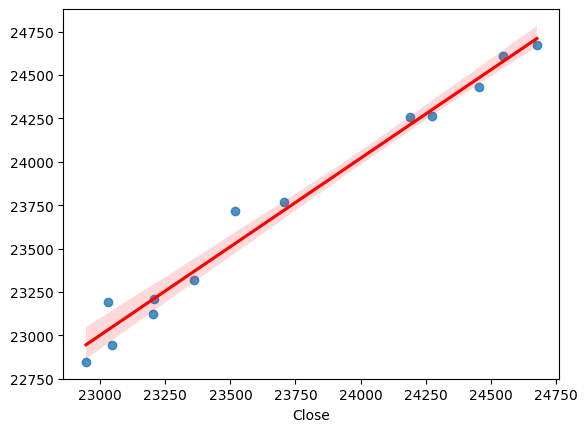

In [28]:
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'red'})
plt.show()

<font size="6" color='pink'>Evaluation</font>

In [29]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Error rate is {mape:.2f}%")

Error rate is 0.30%


In [30]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error is {mae}')

Mean Absolute Error is 70.4621897343887


In [31]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error is {mse}')

Mean Squared Error is 8093.380538716373


In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error is {rmse}')

Root Mean Squared Error is 89.96321769877049


<font size="6" color='pink'>Accuracy Testing</font>

In [33]:
type(X_train)

pandas.core.frame.DataFrame

In [34]:
X_train.head(2)

,Open,High,Low,Shares Traded,Turnover(₹ Cr),Day,Month,Year
13,24633.90,24705.00,24580.05,248139308,25099.79,9,12,2024
34,23746.65,23751.85,23496.15,266375381,24718.54,8,1,2025


In [35]:
test1 = np.array([22963.65, 22992.50, 22801.50, 48139308, 25099.79, 18, 1, 2025]).reshape(1,-1)

In [36]:
predicted_performance = model.predict(test1)
print(f"Closing Amount is {predicted_performance[0].astype(int)}")

Closing Amount is 22850


C:\Users\Dushyant\Downloads\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
